#**Exploratory Data Analysis**

##**Import Library**

In [132]:
# Data loading and data analysis
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

##**Dataset Information**

In [133]:
data_rev = pd.read_csv('coffee_rev.csv')
data_rev.head(5)

,slug,all_text,rating,roaster,name,location,origin,roast,est_price,review_date,agtron,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/ethiopia-r...,\n\n\n94\n\n\nTemple Coffee\nEthiopia Reko Yi...,94,Temple Coffee,Ethiopia Reko Yirgacheffe,"Sacramento, California","Yirgacheffe growing region, southern Ethiopia",Medium-Light,$23.50/12 ounces,November 2022,60/76,9.0,9.0,9.0,9.0,8.0,NaN,"Rich-toned, deeply floral. White peach, tea ro...",Produced by the Reko Farming Cooperative from ...,A classic washed Yirgacheffe cup driven by not...
1,https://www.coffeereview.com/review/double-ana...,\n\n\n94\n\n\nGenesis Coffee Lab\nDouble-Anae...,94,Genesis Coffee Lab,Double-Anaerobic Fermentation Tamiru Tadesse,"Big Lake, Alaska","Sidamo growing region, south-central Ethiopia",Light,$40.00/10 ounces,November 2022,62/80,9.0,9.0,9.0,9.0,8.0,NaN,"Richly floral-toned, crisply sweet. Honeysuckl...",Produced by Tamiru Tadesse of Alo Coffee. Sout...,A floral-driven anaerobic Ethiopia cup free of...
2,https://www.coffeereview.com/review/ethiopia-c...,\n\n\n94\n\n\nJaunt Coffee Roasters\nEthiopia...,94,Jaunt Coffee Roasters,Ethiopia Chelbesa Danche Yirgacheffe,"San Diego, California","Chelchele, Gedeb District, Gedeo Zone, Ethiopia",Medium-Light,$24.00/12 ounces,November 2022,60/77,9.0,9.0,9.0,9.0,8.0,NaN,"Elegantly sweet, floral-toned. Lilac, almond, ...",Produced by the METAD farm and mill in souther...,"A brightly sweet, fragrantly floral-driven was..."
3,https://www.coffeereview.com/review/ethiopia-h...,\n\n\n94\n\n\nGenesis Coffee Lab\nEthiopia Ho...,94,Genesis Coffee Lab,Ethiopia Honey Process Tamiru Tadesse,"Big Lake, Alaska","Sidamo growing region, south-central Ethiopia",Light,$35.00/10 ounces,November 2022,64/83,9.0,9.0,9.0,9.0,8.0,NaN,"Delicately fruit-toned, tisane-like. Dried str...",Produced by Tamiru Tadesse of Alo Coffee. Sout...,"A delicate, elegant, honey-processed Sidamo cu..."
4,https://www.coffeereview.com/review/colombia-p...,\n\n\n93\n\n\nJaunt Coffee Roasters\nColombia...,93,Jaunt Coffee Roasters,Colombia Planadas Tolima,"San Diego, California","Tolima, Colombia",Light,$24.00/8 ounces,November 2022,65/81,9.0,9.0,8.0,9.0,8.0,NaN,"Delicate, richly aromatic. Pineapple, almond n...",Produced by Jorge Elias Rojas entirely of the ...,"A lovely Colombia Geisha cup, finely tea-like ..."


In [134]:
print(f'Data consist of {data_rev.shape[1]} columns')
print(f'Each column consists of {data_rev.shape[0]} records')

Data consist of 20 columns
Each column consists of 2278 records


In [135]:
column_headers = list(data_rev.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['slug', 'all_text', 'rating', 'roaster', 'name', 'location', 'origin', 'roast', 'est_price', 'review_date', 'agtron', 'aroma', 'acid', 'body', 'flavor', 'aftertaste', 'with_milk', 'desc_1', 'desc_2', 'desc_3']


##**Choose The Column to Use**

**The variables that we will use in this project:**

* name : Coffee name
* origin : Coffee origin
* rating : Coffee rating (0-100)
* roaster : Coffee roasting company
* aroma : Coffee aroma
* acid : Coffee acidity
* body : Coffee body size
* flavor : Coffee flavor
* aftertaste : Coffee aftertaste
* desc_1 : Description coffee by Blind Assessment
* desc_2 : Description coffee by Notes
* desc_3 : Description coffee by The Bottom Line


In [136]:
coffee_rev = data_rev.filter(['slug', 'name', 'origin', 'rating', 'roaster', 'aroma', 'acid', 'body', 'flavor', 'aftertaste', 'with_milk', 'desc_1', 'desc_2', 'desc_3'])
coffee_rev.head(5)

,slug,name,origin,rating,roaster,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/ethiopia-r...,Ethiopia Reko Yirgacheffe,"Yirgacheffe growing region, southern Ethiopia",94,Temple Coffee,9.0,9.0,9.0,9.0,8.0,NaN,"Rich-toned, deeply floral. White peach, tea ro...",Produced by the Reko Farming Cooperative from ...,A classic washed Yirgacheffe cup driven by not...
1,https://www.coffeereview.com/review/double-ana...,Double-Anaerobic Fermentation Tamiru Tadesse,"Sidamo growing region, south-central Ethiopia",94,Genesis Coffee Lab,9.0,9.0,9.0,9.0,8.0,NaN,"Richly floral-toned, crisply sweet. Honeysuckl...",Produced by Tamiru Tadesse of Alo Coffee. Sout...,A floral-driven anaerobic Ethiopia cup free of...
2,https://www.coffeereview.com/review/ethiopia-c...,Ethiopia Chelbesa Danche Yirgacheffe,"Chelchele, Gedeb District, Gedeo Zone, Ethiopia",94,Jaunt Coffee Roasters,9.0,9.0,9.0,9.0,8.0,NaN,"Elegantly sweet, floral-toned. Lilac, almond, ...",Produced by the METAD farm and mill in souther...,"A brightly sweet, fragrantly floral-driven was..."
3,https://www.coffeereview.com/review/ethiopia-h...,Ethiopia Honey Process Tamiru Tadesse,"Sidamo growing region, south-central Ethiopia",94,Genesis Coffee Lab,9.0,9.0,9.0,9.0,8.0,NaN,"Delicately fruit-toned, tisane-like. Dried str...",Produced by Tamiru Tadesse of Alo Coffee. Sout...,"A delicate, elegant, honey-processed Sidamo cu..."
4,https://www.coffeereview.com/review/colombia-p...,Colombia Planadas Tolima,"Tolima, Colombia",93,Jaunt Coffee Roasters,9.0,9.0,8.0,9.0,8.0,NaN,"Delicate, richly aromatic. Pineapple, almond n...",Produced by Jorge Elias Rojas entirely of the ...,"A lovely Colombia Geisha cup, finely tea-like ..."


##**Handling Missing Value**

In [137]:
duplicate_rev = coffee_rev[coffee_rev.duplicated('name')]
 
print("Duplicate Rows :")

duplicate_rev

Duplicate Rows :


,slug,name,origin,rating,roaster,aroma,acid,body,flavor,aftertaste,with_milk,desc_1,desc_2,desc_3
293,https://www.coffeereview.com/review/colombia-t...,Colombia Tres Dragones,"Caicedonia, Valle de Cauca Department, Colombia",95,modcup coffee,9.0,9.0,9.0,9.0,9.0,NaN,"Richly sweet-savory, fruit-forward, juicy. Dri...",Produced by Rigoberto and Rodrigo Herrera of F...,A sweetly fermenty fruit bomb with both vibran...
294,https://www.coffeereview.com/review/colombia-q...,Colombia Quindio Anaerobic Natural,"Quindio Department, Colombia",94,Paradise Roasters,9.0,9.0,9.0,9.0,8.0,NaN,Richly fruit and spice-toned. Dried elderberry...,Produced by smallholding farmers and processed...,"A deeply satisfying, savory-sweet Colombia ana..."
317,https://www.coffeereview.com/review/costa-rica...,Costa Rica Naranjo Danilo Salazar Arias,"Alajuela, Costa Rica",94,Coffee by Design,9.0,9.0,9.0,9.0,8.0,NaN,"Bright, richly sweet-tart, fruit-toned. Pomegr...",Produced by Danilo Salazar Arias of San Cristo...,"A lively, juicy-bright natural-processed Costa..."
343,https://www.coffeereview.com/review/kona-sl34-...,Kona SL34 Champagne Natural Uluwehi Farm,"Holualoa, Kona, Big Island of Hawai’i",94,Paradise Roasters,9.0,9.0,9.0,9.0,8.0,NaN,"Tropical fruit-toned, juicy and bright. Lychee...","Produced at Uluwehi Coffee Farm, entirely of t...","A complex, multi-layered Kona SL34 cup process..."
398,https://www.coffeereview.com/review/espresso-b...,Espresso Blend,"India, Brazil, Ethiopia, Indonesia, Colombia",92,Ba Yang Coffee,8.0,NaN,9.0,9.0,7.0,9.0,Evaluated as espresso. Chocolaty and nut-toned...,"A blend of coffees from India, Brazil, Ethiopi...","A friendly, accessible, richly chocolate-drive..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,https://www.coffeereview.com/review/kenya-gich...,Kenya Gicherori,"Kiambu County, south-central Kenya",91,The WestBean Coffee Roasters,8.0,8.0,8.0,9.0,8.0,NaN,"Sweetly savory, layered. Rhododendron-like flo...",Despite grower discontent and urban encroachme...,"A round, sweetly savory Kenya enlivened by the..."
2257,https://www.coffeereview.com/review/sweet-holi...,Sweet Holiday Blend,Ethiopia; Kenya; Colombia,93,Red Rooster Coffee Roaster,9.0,8.0,9.0,9.0,8.0,NaN,"Richly sweet, spice-toned. Baker’s chocolate, ...",This coffee tied for the fourth-highest rating...,"A brightly juicy, sweet blend with richly laye..."
2259,https://www.coffeereview.com/review/holiday-bl...,Holiday Blend,Ethiopia; Costa Rica; Panama,93,Fumi Coffee,9.0,9.0,8.0,9.0,8.0,NaN,"Crisply sweet-tart, high-toned. Lemon verbena,...",This coffee tied for the fourth-highest rating...,A lovely blend of four exceptional coffees tha...
2266,https://www.coffeereview.com/review/el-salvado...,El Salvador Finca Kilimanjaro,"Santa Ana Department, El Salvador",95,Bird Rock Coffee Roasters,9.0,9.0,9.0,9.0,9.0,NaN,"High-toned, richly sweet. Strawberry guava, ro...",This exceptional coffee was selected as the No...,"A graceful, generously fruit- and floral-toned..."


In [138]:
coffee_rev.isnull().sum()

slug             0
name             0
origin           0
rating           0
roaster          0
aroma           27
acid           328
body             3
flavor           3
aftertaste       3
with_milk     1929
desc_1           0
desc_2           0
desc_3           2
dtype: int64

In [139]:
#missing a value for acid or with_milk, but not both
coffee_rev[coffee_rev.acid.isnull() ^ coffee_rev.with_milk.isnull()].shape[0]

2249

In [140]:
#value for both acid and with_milk exist
coffee_rev[~coffee_rev.acid.isnull() & ~coffee_rev.with_milk.isnull()][['acid','with_milk']]

,acid,with_milk
228,9.0,8.0
739,9.0,5.0
1376,9.0,8.0
1377,9.0,9.0
1378,9.0,8.0
1379,9.0,9.0
1380,8.0,9.0
1381,8.0,9.0
1382,9.0,9.0
1383,8.0,9.0


In [141]:
coffee_rev['acid_or_milk'] = coffee_rev['acid'].fillna(coffee_rev.with_milk)
coffee_rev['type_with_milk'] = coffee_rev['with_milk'].fillna(0).map(lambda x: 1 if x > 0 else 0)

In [142]:
coffee_rev['acid_or_milk'].describe()

count    2274.000000
mean        8.543536
std         0.630013
min         1.000000
25%         8.000000
50%         9.000000
75%         9.000000
max        10.000000
Name: acid_or_milk, dtype: float64

In [143]:
coffee_rev.acid_or_milk.isnull().sum()

4

In [144]:
coffee_rev = coffee_rev.dropna(subset=['acid_or_milk'],axis=0)

In [145]:
coffee_rev.isnull().sum()

slug                 0
name                 0
origin               0
rating               0
roaster              0
aroma               24
acid               324
body                 0
flavor               0
aftertaste           0
with_milk         1925
desc_1               0
desc_2               0
desc_3               2
acid_or_milk         0
type_with_milk       0
dtype: int64

In [146]:
coffee_data = coffee_rev.filter(['slug', 'name', 'origin', 'rating', 'roaster', 'aroma', 'acid_or_milk', 'body', 'flavor', 'aftertaste', 'desc_1', 'desc_2', 'desc_3'])
coffee_data.head(5)

,slug,name,origin,rating,roaster,aroma,acid_or_milk,body,flavor,aftertaste,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/ethiopia-r...,Ethiopia Reko Yirgacheffe,"Yirgacheffe growing region, southern Ethiopia",94,Temple Coffee,9.0,9.0,9.0,9.0,8.0,"Rich-toned, deeply floral. White peach, tea ro...",Produced by the Reko Farming Cooperative from ...,A classic washed Yirgacheffe cup driven by not...
1,https://www.coffeereview.com/review/double-ana...,Double-Anaerobic Fermentation Tamiru Tadesse,"Sidamo growing region, south-central Ethiopia",94,Genesis Coffee Lab,9.0,9.0,9.0,9.0,8.0,"Richly floral-toned, crisply sweet. Honeysuckl...",Produced by Tamiru Tadesse of Alo Coffee. Sout...,A floral-driven anaerobic Ethiopia cup free of...
2,https://www.coffeereview.com/review/ethiopia-c...,Ethiopia Chelbesa Danche Yirgacheffe,"Chelchele, Gedeb District, Gedeo Zone, Ethiopia",94,Jaunt Coffee Roasters,9.0,9.0,9.0,9.0,8.0,"Elegantly sweet, floral-toned. Lilac, almond, ...",Produced by the METAD farm and mill in souther...,"A brightly sweet, fragrantly floral-driven was..."
3,https://www.coffeereview.com/review/ethiopia-h...,Ethiopia Honey Process Tamiru Tadesse,"Sidamo growing region, south-central Ethiopia",94,Genesis Coffee Lab,9.0,9.0,9.0,9.0,8.0,"Delicately fruit-toned, tisane-like. Dried str...",Produced by Tamiru Tadesse of Alo Coffee. Sout...,"A delicate, elegant, honey-processed Sidamo cu..."
4,https://www.coffeereview.com/review/colombia-p...,Colombia Planadas Tolima,"Tolima, Colombia",93,Jaunt Coffee Roasters,9.0,9.0,8.0,9.0,8.0,"Delicate, richly aromatic. Pineapple, almond n...",Produced by Jorge Elias Rojas entirely of the ...,"A lovely Colombia Geisha cup, finely tea-like ..."


In [147]:
coffee_data.isnull().sum()

slug             0
name             0
origin           0
rating           0
roaster          0
aroma           24
acid_or_milk     0
body             0
flavor           0
aftertaste       0
desc_1           0
desc_2           0
desc_3           2
dtype: int64

Since there are quite a lot of null data in the important columns, we will assign a value of 0 to each of those null columns. We do this because if we remove all null data then we will lose quite a lot of data, and we don't want this.

In [148]:
values = {'aroma': 0.0, 'desc_3': 'nothing'}
coffee_data.fillna(values, inplace=True)

In [149]:
print('The number of null data is ', coffee_data.isnull().sum().sum(), ' records')

The number of null data is  0  records


##**Analyze data for each column**

In [150]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2274 entries, 0 to 2277
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   slug          2274 non-null   object 
 1   name          2274 non-null   object 
 2   origin        2274 non-null   object 
 3   rating        2274 non-null   int64  
 4   roaster       2274 non-null   object 
 5   aroma         2274 non-null   float64
 6   acid_or_milk  2274 non-null   float64
 7   body          2274 non-null   float64
 8   flavor        2274 non-null   float64
 9   aftertaste    2274 non-null   float64
 10  desc_1        2274 non-null   object 
 11  desc_2        2274 non-null   object 
 12  desc_3        2274 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 248.7+ KB


###**Name column**

In [151]:
count_name_rev = coffee_data.name.unique().size
print(f'There are {count_name_rev} different coffee_data name of {coffee_data.shape[0]} data in our dataset')

There are 2071 different coffee_data name of 2274 data in our dataset


We can see that there are a lot of duplicate coffee names. Therefore we will leave one unique name and delete data with duplicate names so that it does not interfere with the filtering and recommendation process

In [152]:
coffee_data = coffee_data.drop_duplicates(subset=['name'])
print(f'There are {count_name_rev} different coffee_data name of {coffee_data.shape[0]} data in our dataset')

There are 2071 different coffee_data name of 2071 data in our dataset


###**Rating column**

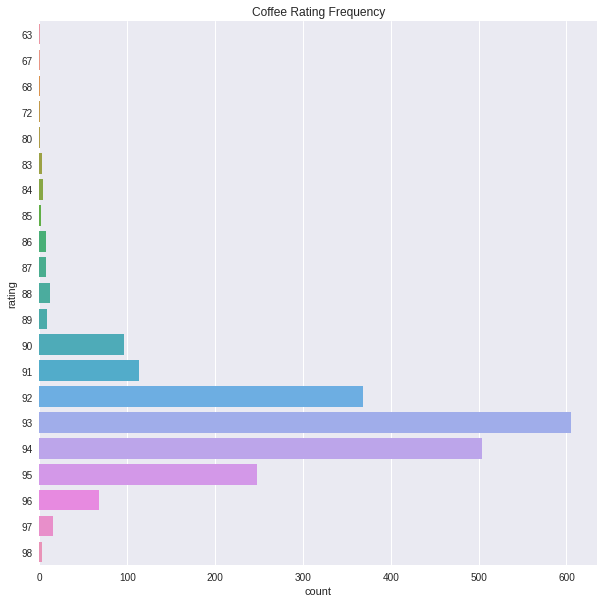

In [153]:
plt.figure(figsize=(10,10))
sns.countplot(y=coffee_data['rating'])
plt.title("Coffee Rating Frequency")
plt.show()

In [154]:
print('Count each value of rating')
coffee_data['rating'].value_counts()

Count each value of rating


93    605
94    504
92    368
95    248
91    113
90     96
96     68
97     15
88     12
89      9
87      8
86      8
84      4
98      3
83      3
85      2
80      1
72      1
68      1
63      1
67      1
Name: rating, dtype: int64

In [155]:
coffee_data['rating'].describe()

count    2071.000000
mean       93.000000
std         2.061143
min        63.000000
25%        92.000000
50%        93.000000
75%        94.000000
max        98.000000
Name: rating, dtype: float64

From the visualization and analysis above, we can see that the majority of our coffee data has a good rating

###**Roaster column**

In [156]:
count_roaster_rev = coffee_data.roaster.unique().size
print(f'There are {count_roaster_rev} different roasters in our dataset')

There are 464 different roasters in our dataset


###**Aroma, acid, and body column**

In [157]:
coffee_data[['aroma', 'acid_or_milk', 'body', 'flavor', 'aftertaste']].describe()

,aroma,acid_or_milk,body,flavor,aftertaste
count,2071.000000,2071.000000,2071.000000,2071.000000,2071.000000
mean,8.739739,8.544182,8.600676,8.946403,8.094640
std,0.973742,0.633870,0.530590,0.453143,0.557535
min,0.000000,1.000000,5.000000,2.000000,2.000000
25%,9.000000,8.000000,8.000000,9.000000,8.000000
50%,9.000000,9.000000,9.000000,9.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


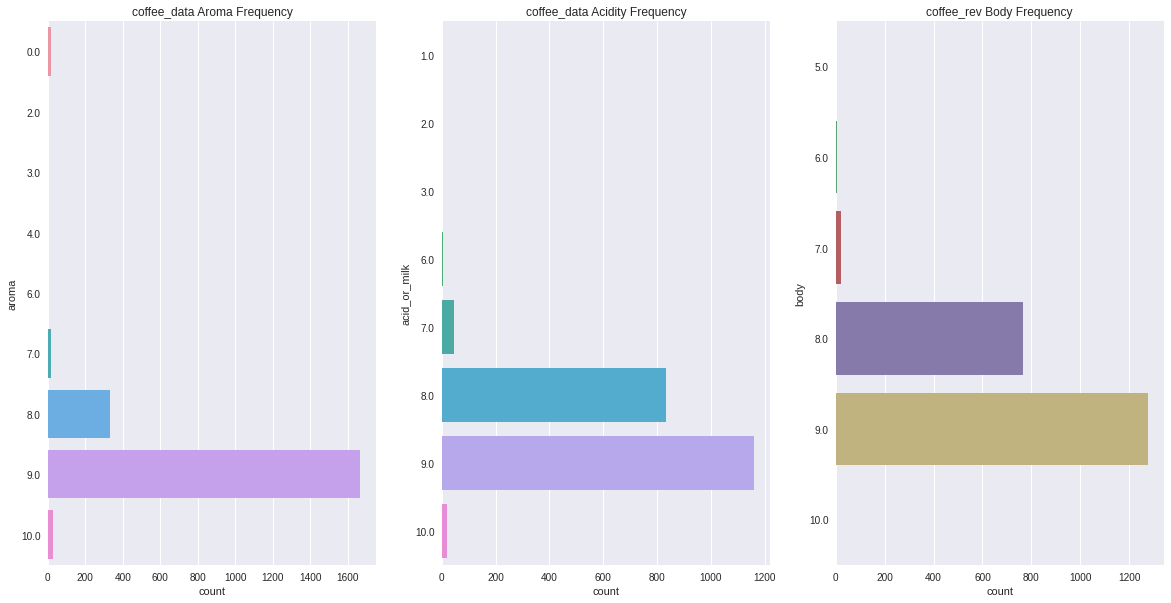

In [158]:
fig, ax = plt.subplots(1,3, figsize=(20, 10))
sns.countplot(y=coffee_data['aroma'], ax=ax[0])
ax[0].set_title('coffee_data Aroma Frequency')
sns.countplot(y=coffee_data['acid_or_milk'], ax=ax[1])
ax[1].set_title('coffee_data Acidity Frequency')
sns.countplot(y=coffee_data['body'], ax=ax[2])
ax[2].set_title('coffee_rev Body Frequency')
fig.show()

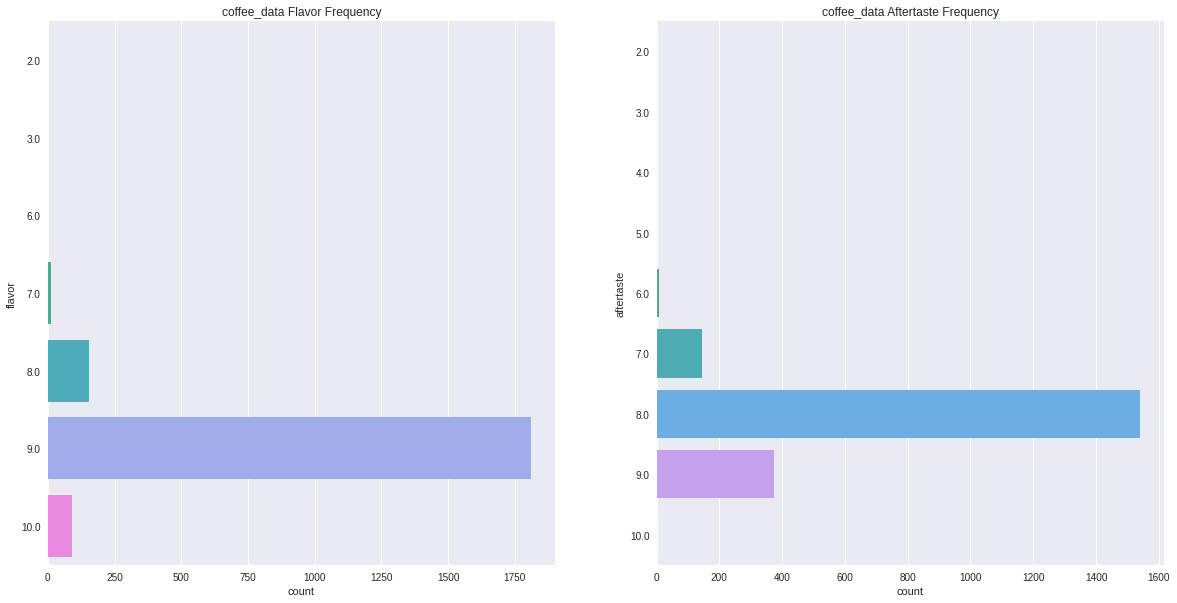

In [159]:
fig, ax = plt.subplots(1,2, figsize=(20, 10))
sns.countplot(y=coffee_data['flavor'], ax=ax[0])
ax[0].set_title('coffee_data Flavor Frequency')
sns.countplot(y=coffee_data['aftertaste'], ax=ax[1])
ax[1].set_title('coffee_data Aftertaste Frequency')
fig.show()

In [160]:
print('Count each value of aroma')
coffee_data['aroma'].value_counts()

Count each value of aroma


9.0     1668
8.0      333
10.0      27
0.0       19
7.0       19
6.0        2
3.0        1
2.0        1
4.0        1
Name: aroma, dtype: int64

In [161]:
print('Count each value of acid')
coffee_data['acid_or_milk'].value_counts()

Count each value of acid


9.0     1162
8.0      835
7.0       44
10.0      21
6.0        5
3.0        2
1.0        1
2.0        1
Name: acid_or_milk, dtype: int64

In [162]:
print('Count each value of body')
coffee_data['body'].value_counts()

Count each value of body


9.0     1277
8.0      764
7.0       24
6.0        4
10.0       1
5.0        1
Name: body, dtype: int64

In [163]:
print('Count each value of flavor')
coffee_data['flavor'].value_counts()

Count each value of flavor


9.0     1810
8.0      153
10.0      91
7.0       12
6.0        2
3.0        2
2.0        1
Name: flavor, dtype: int64

In [164]:
print('Count each value of aftertaste')
coffee_data['aftertaste'].value_counts()

Count each value of aftertaste


8.0     1539
9.0      375
7.0      144
6.0        7
3.0        2
10.0       1
5.0        1
4.0        1
2.0        1
Name: aftertaste, dtype: int64

##**Exporting Final DataFrames**

**Filtering dataset**

In [169]:
coffee_data.to_csv('coffee_clean.csv', index=False)

**Recommendation system dataset**

In [170]:
coffee_recom = coffee_data
coffee_recom.head(1)

,slug,name,origin,rating,roaster,aroma,acid_or_milk,body,flavor,aftertaste,desc_1,desc_2,desc_3
0,https://www.coffeereview.com/review/ethiopia-r...,Ethiopia Reko Yirgacheffe,"Yirgacheffe growing region, southern Ethiopia",94,Temple Coffee,9.0,9.0,9.0,9.0,8.0,"Rich-toned, deeply floral. White peach, tea ro...",Produced by the Reko Farming Cooperative from ...,A classic washed Yirgacheffe cup driven by not...


In [173]:
coffee_recom['label'] = coffee_recom[coffee_recom.columns[5:10]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
coffee_recom.head(5)

,slug,name,origin,rating,roaster,aroma,acid_or_milk,body,flavor,aftertaste,desc_1,desc_2,desc_3,label
0,https://www.coffeereview.com/review/ethiopia-r...,Ethiopia Reko Yirgacheffe,"Yirgacheffe growing region, southern Ethiopia",94,Temple Coffee,9.0,9.0,9.0,9.0,8.0,"Rich-toned, deeply floral. White peach, tea ro...",Produced by the Reko Farming Cooperative from ...,A classic washed Yirgacheffe cup driven by not...,"9.0,9.0,9.0,9.0,8.0"
1,https://www.coffeereview.com/review/double-ana...,Double-Anaerobic Fermentation Tamiru Tadesse,"Sidamo growing region, south-central Ethiopia",94,Genesis Coffee Lab,9.0,9.0,9.0,9.0,8.0,"Richly floral-toned, crisply sweet. Honeysuckl...",Produced by Tamiru Tadesse of Alo Coffee. Sout...,A floral-driven anaerobic Ethiopia cup free of...,"9.0,9.0,9.0,9.0,8.0"
2,https://www.coffeereview.com/review/ethiopia-c...,Ethiopia Chelbesa Danche Yirgacheffe,"Chelchele, Gedeb District, Gedeo Zone, Ethiopia",94,Jaunt Coffee Roasters,9.0,9.0,9.0,9.0,8.0,"Elegantly sweet, floral-toned. Lilac, almond, ...",Produced by the METAD farm and mill in souther...,"A brightly sweet, fragrantly floral-driven was...","9.0,9.0,9.0,9.0,8.0"
3,https://www.coffeereview.com/review/ethiopia-h...,Ethiopia Honey Process Tamiru Tadesse,"Sidamo growing region, south-central Ethiopia",94,Genesis Coffee Lab,9.0,9.0,9.0,9.0,8.0,"Delicately fruit-toned, tisane-like. Dried str...",Produced by Tamiru Tadesse of Alo Coffee. Sout...,"A delicate, elegant, honey-processed Sidamo cu...","9.0,9.0,9.0,9.0,8.0"
4,https://www.coffeereview.com/review/colombia-p...,Colombia Planadas Tolima,"Tolima, Colombia",93,Jaunt Coffee Roasters,9.0,9.0,8.0,9.0,8.0,"Delicate, richly aromatic. Pineapple, almond n...",Produced by Jorge Elias Rojas entirely of the ...,"A lovely Colombia Geisha cup, finely tea-like ...","9.0,9.0,8.0,9.0,8.0"


In [174]:
coffee_recom.to_csv('coffee_recom.csv', index=False)